<a href="https://colab.research.google.com/github/SiddhiNKabra/LP-5/blob/main/dl2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('letter_recognition.data',  header=None, sep = ",")

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar',
              'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
              'xegvy', 'y-ege', 'yegvx']

In [6]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
x = df.drop('letter', axis=1)
y = df['letter']

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
y_categorical = to_categorical(y_encoded)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model = Sequential()

# 3 layers
model.add(Dense(128, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 output neurons - one for each letter

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    x_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4093 - loss: 2.1964 - val_accuracy: 0.7600 - val_loss: 0.8487
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7797 - loss: 0.7602 - val_accuracy: 0.8094 - val_loss: 0.6141
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.5565 - val_accuracy: 0.8600 - val_loss: 0.4866
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.4534 - val_accuracy: 0.8781 - val_loss: 0.4086
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8880 - loss: 0.3711 - val_accuracy: 0.8994 - val_loss: 0.3532
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.3092 - val_accuracy: 0.9125 - val_loss: 0.3147
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.2726 - val_accuracy: 0.9181 - val_loss: 0.2773
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9272 - loss: 0.2400 - val_accuracy: 0.

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 1)
print('Test Accuracy: ', test_accuracy)
print('Test Loss: ', test_loss)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.1965
Test Accuracy:  0.953499972820282
Test Loss:  0.17199799418449402


In [15]:
y_pred = model.predict(x_test)

# convert one-hot predictions back to label indices
pred_indices = np.argmax(y_pred, axis=1)
true_indices = np.argmax(y_test, axis=1)

# convert label indices back to actual letters
pred_labels = label_encoder.inverse_transform(pred_indices)
true_labels = label_encoder.inverse_transform(true_indices)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
print('Predictions vs. Actual')
for i in range(5):
    print('Predicted: ', pred_labels[i], ' | Actual: ', true_labels[i])

Predictions vs. Actual
Predicted:  X  | Actual:  T
Predicted:  L  | Actual:  L
Predicted:  A  | Actual:  A
Predicted:  E  | Actual:  E
Predicted:  Q  | Actual:  Q


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


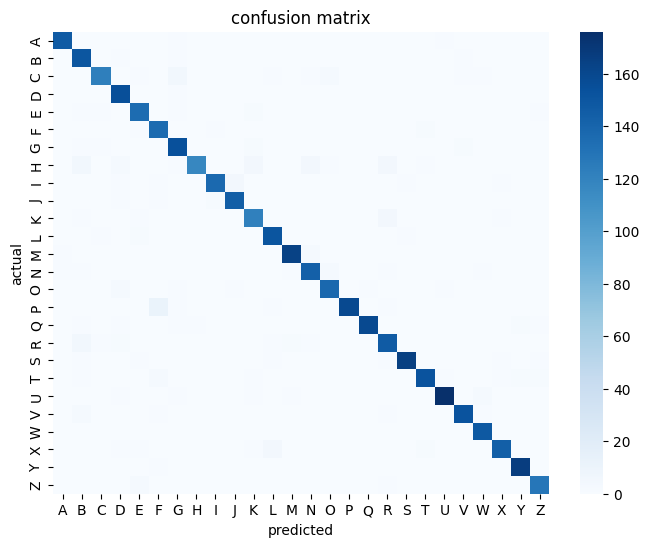

In [18]:
cm = confusion_matrix(true_indices, pred_indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()


In [19]:
report = classification_report(true_indices, pred_indices, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       149
           B       0.87      0.98      0.92       153
           C       0.97      0.90      0.93       137
           D       0.92      0.99      0.95       156
           E       0.93      0.96      0.94       141
           F       0.88      0.97      0.93       140
           G       0.91      0.96      0.94       160
           H       0.99      0.81      0.89       144
           I       0.98      0.94      0.96       146
           J       0.96      0.97      0.97       149
           K       0.91      0.94      0.92       130
           L       0.94      0.97      0.96       155
           M       0.98      0.98      0.98       168
           N       0.93      0.95      0.94       151
           O       0.95      0.95      0.95       145
           P       1.00      0.92      0.96       173
           Q       0.99      0.96      0.98       166
  